Data Preprocessing
The main objective of preprocessing is:
1. checking data set for irrelavent columns which not serve our prediction of length of stay model and deal with it.
2. Handling Categorical Variables:
3. Correlation heatmap after encoding to chech if there are tow features highly correlated to each other & drop one of them.
4. Checking for duplication
5. saving ready encoded and scaled csv file for next modeling step. 

About Dataset:
This dataset is about inpatient discharged from hospitals of state of New York provided by the Dept of Health of New York state for the year of 2015.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,recall_score,precision_score
from imblearn.under_sampling import RandomUnderSampler
from datasist.structdata import detect_outliers
from sklearn.impute import KNNImputer
import category_encoders as ce

In [2]:
# loading the dataset.
data = pd.read_csv('../data/processed/cleaned_data.csv')

In [3]:
# getting copy of the data set
df = data.copy()

In [4]:
# Geitting Information about the Data
df.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331584 entries, 0 to 2331583
Data columns (total 31 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   health_service_area                  2331584 non-null  object 
 1   hospital_county                      2331584 non-null  object 
 2   operating_certificate_number         2331584 non-null  float64
 3   facility_id                          2331584 non-null  float64
 4   facility_name                        2331584 non-null  object 
 5   age_group                            2331584 non-null  object 
 6   zip_code__3_digits                   2331584 non-null  int64  
 7   gender                               2331584 non-null  object 
 8   race                                 2331584 non-null  object 
 9   ethnicity                            2331584 non-null  object 
 10  length_of_stay                       2331584 non-null  int64  
 11

In [5]:
#checking for duplication in data 
df.duplicated().sum()

0

In [8]:
df[df['apr_mdc_description'] == 'Infectious and Parasitic Diseases, Systemic or Unspecified Sites']['apr_mdc_description'].count()

130885

In [9]:
# saving data frame in csv file for Infectious and Parasitic Diseases, Systemic or Unspecified Sites
df[df['apr_mdc_description'] == 'Infectious and Parasitic Diseases, Systemic or Unspecified Sites'].to_csv('../data/processed/Infectious and Parasitic Diseases.csv',index=False)

In [6]:
# veiwing the head of the data the first 5 rows
pd.set_option('display.max_columns', None)  # This will display all columns
df.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code__3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,birth_weight,emergency_department_indicator,total_charges,total_costs,over_120_stay
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,5,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,5620.00,4561.28,0
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,0,Y,7404.18,6933.94,0
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,7931.28,7154.85,0
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,128,Asthma,0,NO PROC,141,Asthma,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,0,Y,11304.44,4584.11,0
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,83,Epilepsy; convulsions,0,NO PROC,53,Seizure,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,Medicaid,0,Y,8330.50,4361.74,0


* From the above and by puting the aim of our model in mind we can noticed that:

Not all the feature will serve our aim as we try to make general model could predict patient length of stay regard less of the city or state also as total cost also stay over 120 and chrges comes at the end of stay they don't make sence to keep them. then the following columns not usefull for the aim of this model it is better to be droped: ('health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity','zip_code__3_digits', 'patient_disposition','payment_typology_1','total_charges','total_costs','over_120_stay')

In [7]:
# dropping unnecessary columns for the model from data frame
df.drop(['health_service_area','hospital_county','operating_certificate_number','facility_id','facility_name','race','ethnicity','zip_code__3_digits','patient_disposition','payment_typology_1','total_charges','total_costs','over_120_stay'],axis=1, inplace=True)

In [8]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,birth_weight,emergency_department_indicator
0,50 to 69,F,5,Emergency,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,0,Y
1,18 to 29,F,8,Emergency,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,0,Y
2,30 to 49,M,8,Emergency,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,0,Y
3,50 to 69,F,4,Emergency,128,Asthma,0,NO PROC,141,Asthma,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,0,Y
4,50 to 69,M,3,Emergency,83,Epilepsy; convulsions,0,NO PROC,53,Seizure,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,0,Y


In [9]:
df.drop(['ccs_diagnosis_code','ccs_procedure_code','apr_drg_code','apr_mdc_code','apr_severity_of_illness_code','birth_weight'],axis=1, inplace=True)

In [10]:
#checking for duplication in data 
df.duplicated().sum()

1545288

In [11]:
# Drop duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

In [12]:
df.describe()

,length_of_stay
count,786296.000000
mean,8.680939
std,11.685402
min,1.000000
25%,3.000000
50%,5.000000
75%,10.000000
max,120.000000


In [13]:
# Geitting Information about the Data
df.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786296 entries, 0 to 786295
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   age_group                            786296 non-null  object
 1   gender                               786296 non-null  object
 2   length_of_stay                       786296 non-null  int64 
 3   type_of_admission                    786296 non-null  object
 4   ccs_diagnosis_description            786296 non-null  object
 5   ccs_procedure_description            786296 non-null  object
 6   apr_drg_description                  786296 non-null  object
 7   apr_mdc_description                  786296 non-null  object
 8   apr_severity_of_illness_description  786296 non-null  object
 9   apr_risk_of_mortality                786296 non-null  object
 10  apr_medical_surgical_description     786296 non-null  object
 11  emergency_department_indic

In [14]:
df.age_group.value_counts()

50 to 69       259317
70 or Older    258530
30 to 49       140970
18 to 29        65614
0 to 17         61865
Name: age_group, dtype: int64

In [15]:
young = df[df['age_group'] == '0 to 17'].index

In [16]:
df.drop(young, axis=0,inplace=True)

In [17]:
df.age_group.value_counts()

50 to 69       259317
70 or Older    258530
30 to 49       140970
18 to 29        65614
Name: age_group, dtype: int64

In [18]:
# Identify the outliers in the higher range of the values
outliers = df['length_of_stay'] > 30

# Replace the outliers with 30
df['length_of_stay'] = np.where(outliers, np.nan, df['length_of_stay'])

In [19]:
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697513 entries, 0 to 786295
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age_group                            697513 non-null  object 
 1   gender                               697513 non-null  object 
 2   length_of_stay                       697513 non-null  float64
 3   type_of_admission                    697513 non-null  object 
 4   ccs_diagnosis_description            697513 non-null  object 
 5   ccs_procedure_description            697513 non-null  object 
 6   apr_drg_description                  697513 non-null  object 
 7   apr_mdc_description                  697513 non-null  object 
 8   apr_severity_of_illness_description  697513 non-null  object 
 9   apr_risk_of_mortality                697513 non-null  object 
 10  apr_medical_surgical_description     697513 non-null  object 
 11  emergency_dep

In [21]:
df.describe()

,length_of_stay
count,697513.000000
mean,6.911071
std,5.930181
min,1.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,30.000000


In [22]:
# checking features value counts.
for i in list(df.columns):
    print(i)
    print(df[i].value_counts())
    print("*"*100)

age_group
70 or Older    249890
50 to 69       248212
30 to 49       136168
18 to 29        63243
Name: age_group, dtype: int64
****************************************************************************************************
gender
F    360035
M    337478
Name: gender, dtype: int64
****************************************************************************************************
length_of_stay
2.0     85287
3.0     83246
1.0     75987
4.0     71556
5.0     59492
6.0     50393
7.0     43454
8.0     34841
9.0     27936
10.0    22994
11.0    19156
12.0    16278
13.0    14721
14.0    13616
15.0    10992
16.0     9155
17.0     7880
18.0     6796
19.0     5817
20.0     5611
21.0     5542
22.0     4505
23.0     3757
24.0     3304
25.0     2983
28.0     2880
26.0     2710
27.0     2636
29.0     2175
30.0     1813
Name: length_of_stay, dtype: int64
****************************************************************************************************
type_of_admission
Emergency        516078

In [23]:
# checking features n unique.
for i in list(df.columns):
    print(i)
    print(df[i].nunique())
    print("*"*100)

age_group
4
****************************************************************************************************
gender
2
****************************************************************************************************
length_of_stay
30
****************************************************************************************************
type_of_admission
6
****************************************************************************************************
ccs_diagnosis_description
257
****************************************************************************************************
ccs_procedure_description
232
****************************************************************************************************
apr_drg_description
285
****************************************************************************************************
apr_mdc_description
24
****************************************************************************************************
apr_severity_of_illness_de

### First encoding oridinal feature: 
By creating dictionary with ordinal number and maping the dictionary with the ordinal categorical feature

In [24]:
# age_group:
dict_age_group = {'18 to 29':1, '30 to 49':2, '50 to 69':3, '70 or Older':4}
# maping age goup dictionary
df['age_group'] = df['age_group'].map(dict_age_group)

In [25]:
df['age_group'].unique()

array([3, 1, 2, 4], dtype=int64)

In [26]:
# apr_severity_of_illness_description Already encoded by apr_severity_of_illness_code but we will made dictionery for it.
dict_apr_severity_of_illness_description = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df.apr_severity_of_illness_description = df.apr_severity_of_illness_description.map(dict_apr_severity_of_illness_description)
df.apr_severity_of_illness_description.unique()

array([1, 2, 3, 4], dtype=int64)

In [27]:
# apr_risk_of_mortality:
dict_apr_risk_of_mortality = {'Minor':1, 'Moderate':2, 'Major':3, 'Extreme':4}
df["apr_risk_of_mortality"] = df["apr_risk_of_mortality"].map(dict_apr_risk_of_mortality)

In [28]:
df["apr_risk_of_mortality"].unique()

array([1, 2, 3, 4], dtype=int64)

### Second encoding nominal feature:
* For Features with high cardinality we are going to use Target Encoding (Mean Encoding) then dropping it:
  - (ccs_diagnosis_description: 263 unique, ccs_procedure_description: 232, apr_drg_description: 314, apr_mdc_description: 25 unique values, type_of_admission: 6)     


* For features with low cardinality we are going to use get dumies to encode it features like:

  - (gender: 2 unique, apr_medical_surgical_description: 2, emergency_department_indicator: 2) 

In [29]:
df.head()

,age_group,gender,length_of_stay,type_of_admission,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,emergency_department_indicator
0,3,F,5.0,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,1,1,Medical,Y
1,1,F,8.0,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,2,1,Medical,Y
2,2,M,8.0,Emergency,Mood disorders,NO PROC,Bipolar disorders,Mental Diseases and Disorders,1,1,Medical,Y
3,3,F,4.0,Emergency,Asthma,NO PROC,Asthma,Diseases and Disorders of the Respiratory System,1,1,Medical,Y
4,3,M,3.0,Emergency,Epilepsy; convulsions,NO PROC,Seizure,Diseases and Disorders of the Nervous System,2,2,Medical,Y


In [30]:
df.duplicated().sum()

0

In [31]:
ce_bin = ce.BinaryEncoder()

In [32]:
df = ce_bin.fit_transform(df)

In [33]:
# I am interested in take a look at correlation matrics after features encoded:
corr_mat = round(df.corr()['length_of_stay'].sort_values(ascending=False),2)
corr_mat

length_of_stay                         1.00
apr_severity_of_illness_description    0.37
apr_risk_of_mortality                  0.32
age_group                              0.12
apr_medical_surgical_description_0     0.09
ccs_procedure_description_6            0.09
apr_mdc_description_4                  0.09
apr_drg_description_2                  0.08
ccs_procedure_description_0            0.07
ccs_procedure_description_1            0.05
apr_drg_description_1                  0.04
ccs_procedure_description_5            0.04
ccs_diagnosis_description_6            0.03
emergency_department_indicator_1       0.03
gender_0                               0.03
ccs_procedure_description_2            0.03
apr_drg_description_3                  0.02
apr_mdc_description_3                  0.02
ccs_diagnosis_description_2            0.02
apr_drg_description_0                  0.01
apr_mdc_description_1                  0.01
ccs_diagnosis_description_7            0.01
ccs_procedure_description_3     

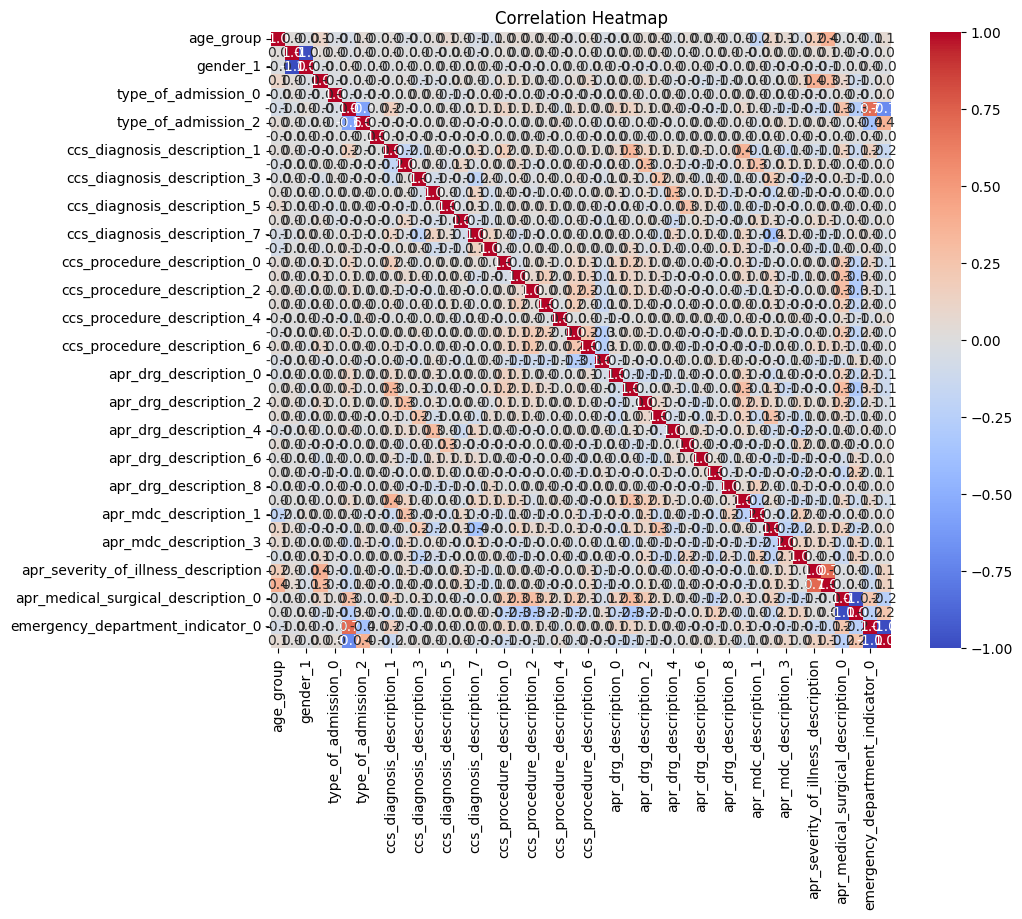

In [34]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
df.corr()

,age_group,gender_0,gender_1,length_of_stay,type_of_admission_0,type_of_admission_1,type_of_admission_2,ccs_diagnosis_description_0,ccs_diagnosis_description_1,ccs_diagnosis_description_2,ccs_diagnosis_description_3,ccs_diagnosis_description_4,ccs_diagnosis_description_5,ccs_diagnosis_description_6,ccs_diagnosis_description_7,ccs_diagnosis_description_8,ccs_procedure_description_0,ccs_procedure_description_1,ccs_procedure_description_2,ccs_procedure_description_3,ccs_procedure_description_4,ccs_procedure_description_5,ccs_procedure_description_6,ccs_procedure_description_7,apr_drg_description_0,apr_drg_description_1,apr_drg_description_2,apr_drg_description_3,apr_drg_description_4,apr_drg_description_5,apr_drg_description_6,apr_drg_description_7,apr_drg_description_8,apr_mdc_description_0,apr_mdc_description_1,apr_mdc_description_2,apr_mdc_description_3,apr_mdc_description_4,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description_0,apr_medical_surgical_description_1,emergency_department_indicator_0,emergency_department_indicator_1
age_group,1.000000,0.018297,-0.018297,0.115035,-0.031933,-0.066437,0.043655,-0.006994,0.023732,-0.039825,-0.019515,0.018066,0.074701,0.029725,-0.054920,-0.071100,0.036276,0.047314,0.037479,0.034914,-0.004052,-0.023365,0.042382,-0.041229,-0.036467,0.009134,0.042210,0.045663,-0.042133,0.040127,0.004990,0.019129,-0.022384,0.000396,-0.189589,0.115804,0.059074,-0.048144,0.191962,0.370231,-0.007975,0.007975,-0.057413,0.057413
gender_0,0.018297,1.000000,-1.000000,0.031309,0.020490,-0.037429,0.022690,-0.004790,0.020480,-0.004542,0.007760,-0.011953,-0.002704,0.010646,-0.038092,-0.000720,0.024814,0.011134,0.035818,0.016678,-0.007782,-0.003212,0.024176,-0.019862,0.007534,0.031910,0.041359,0.034096,-0.035096,0.005069,-0.010373,0.013392,0.019872,-0.001066,-0.037973,0.044257,0.015768,0.015491,0.043073,0.059312,0.012377,-0.012377,-0.021249,0.021249
gender_1,-0.018297,-1.000000,1.000000,-0.031309,-0.020490,0.037429,-0.022690,0.004790,-0.020480,0.004542,-0.007760,0.011953,0.002704,-0.010646,0.038092,0.000720,-0.024814,-0.011134,-0.035818,-0.016678,0.007782,0.003212,-0.024176,0.019862,-0.007534,-0.031910,-0.041359,-0.034096,0.035096,-0.005069,0.010373,-0.013392,-0.019872,0.001066,0.037973,-0.044257,-0.015768,-0.015491,-0.043073,-0.059312,-0.012377,0.012377,0.021249,-0.021249
length_of_stay,0.115035,0.031309,-0.031309,1.000000,-0.021712,-0.021866,0.000128,-0.003927,-0.008256,0.021743,-0.062110,-0.042178,-0.036011,0.033706,0.008685,-0.037914,0.067421,0.054901,0.030276,0.001192,-0.020533,0.037471,0.089188,-0.037241,0.013915,0.037774,0.078388,0.022037,-0.041808,-0.022914,-0.082658,-0.062225,-0.033431,-0.020978,0.011395,-0.026468,0.022010,0.088930,0.370637,0.317472,0.094520,-0.094520,-0.032537,0.032537
type_of_admission_0,-0.031933,0.020490,-0.020490,-0.021712,1.000000,-0.049525,-0.027376,-0.000522,-0.008831,0.014658,0.016837,0.018634,-0.051532,-0.043632,-0.001333,0.030853,-0.010091,-0.000890,0.002213,-0.019010,-0.001675,-0.002029,-0.009246,-0.012456,0.008581,0.013638,-0.012023,0.012187,0.027984,-0.019261,0.005416,-0.012942,0.026189,0.019531,0.014254,-0.018221,0.004998,-0.010278,-0.016842,-0.022464,0.020279,-0.020279,-0.035226,0.035226
type_of_admission_1,-0.066437,-0.037429,0.037429,-0.021866,-0.049525,1.000000,-0.573662,0.005855,0.160938,-0.001073,-0.009083,0.002456,0.009363,-0.017360,0.060097,0.052562,0.118878,0.057930,0.072693,0.033044,-0.053158,0.079778,0.016950,0.028807,0.121301,0.125785,0.057243,0.022054,0.046973,-0.030985,-0.028555,-0.064563,-0.020345,0.087010,0.021571,-0.059853,-0.114793,-0.030565,-0.122193,-0.138476,0.272775,-0.272775,0.695546,-0.695546
type_of_admission_2,0.043655,0.022690,-0.022690,0.000128,-0.027376,-0.573662,1.000000,-0.002438,-0.002661,-0.000615,-0.002262,0.003187,0.005341,-0.013522,-0.004169,-0.009564,-0.010320,0.011197,0.007612,0.016538,0.049782,-0.009133,0.016773,-0.040244,0.003077,-0.016087,0.009877,-0.002142,-0.024957,0.009417,0.005829,0.007692,-0.0108

* from the above there high correlaiton -8 between birth_weight & type_of_admission we are going to drop birth weight feature.
* type_of_admission & emergency_department_indicator_Y with corr = 0.7 we are going to drop emergency_department_indicator_Y feature.
* apr_severity_of_illness_description & apr_risk_of_mortality corr = 0.8 we are going to drop apr_risk_of_mortality.
* ccs_diagnosis_description have 0.6 and 0.7  positive correlanialty with apr_drg_description, apr_mdc_description respectively we are going to drop apr_drg_description, apr_mdc_description.

In [36]:
# dropping highly correlated feature ['birth_weight','emergency_department_indicator_Y','apr_risk_of_mortality']
df.drop(['apr_risk_of_mortality'],axis=1,inplace=True)

In [37]:
#checking for duplication in data after feature encoded. 
df.duplicated().sum()

103830

In [38]:
# Drop duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

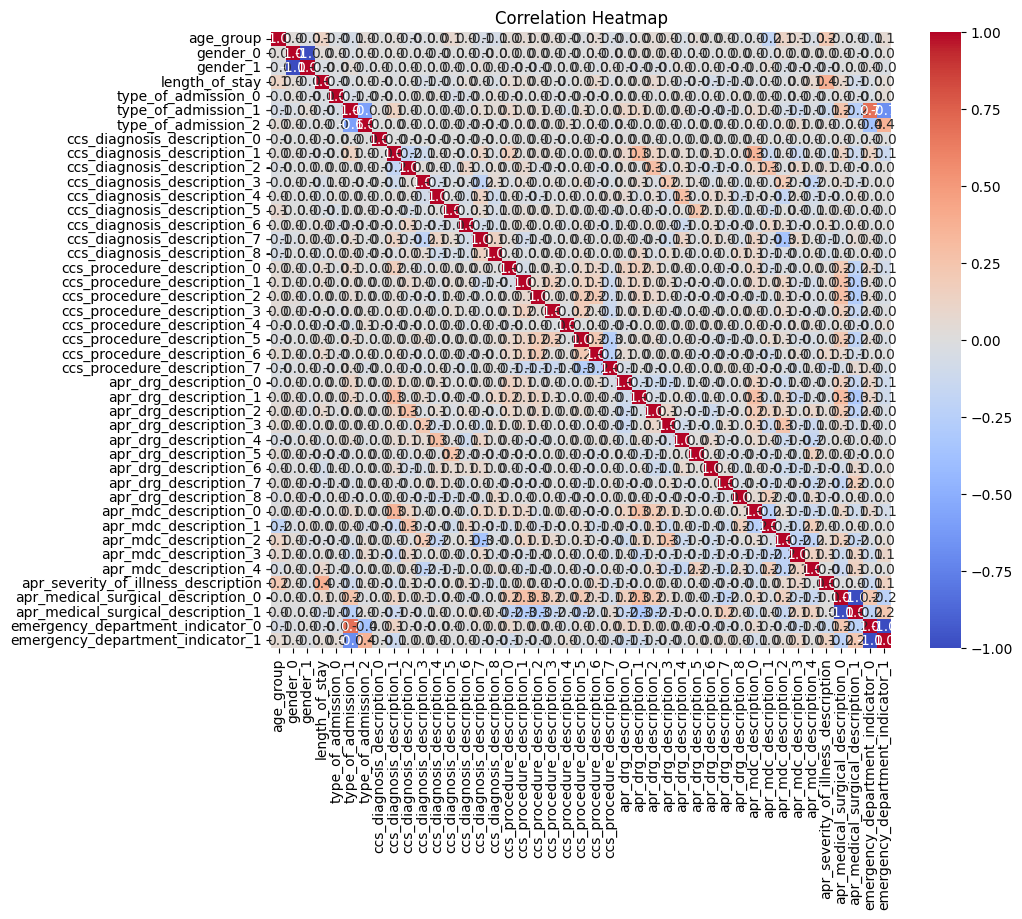

In [42]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
# Geitting Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593683 entries, 0 to 593682
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age_group                            593683 non-null  int64  
 1   gender_0                             593683 non-null  int64  
 2   gender_1                             593683 non-null  int64  
 3   length_of_stay                       593683 non-null  float64
 4   type_of_admission_0                  593683 non-null  int64  
 5   type_of_admission_1                  593683 non-null  int64  
 6   type_of_admission_2                  593683 non-null  int64  
 7   ccs_diagnosis_description_0          593683 non-null  int64  
 8   ccs_diagnosis_description_1          593683 non-null  int64  
 9   ccs_diagnosis_description_2          593683 non-null  int64  
 10  ccs_diagnosis_description_3          593683 non-null  int64  
 11  ccs_diagnosis

In [44]:
df.describe()

,age_group,gender_0,gender_1,length_of_stay,type_of_admission_0,type_of_admission_1,type_of_admission_2,ccs_diagnosis_description_0,ccs_diagnosis_description_1,ccs_diagnosis_description_2,ccs_diagnosis_description_3,ccs_diagnosis_description_4,ccs_diagnosis_description_5,ccs_diagnosis_description_6,ccs_diagnosis_description_7,ccs_diagnosis_description_8,ccs_procedure_description_0,ccs_procedure_description_1,ccs_procedure_description_2,ccs_procedure_description_3,ccs_procedure_description_4,ccs_procedure_description_5,ccs_procedure_description_6,ccs_procedure_description_7,apr_drg_description_0,apr_drg_description_1,apr_drg_description_2,apr_drg_description_3,apr_drg_description_4,apr_drg_description_5,apr_drg_description_6,apr_drg_description_7,apr_drg_description_8,apr_mdc_description_0,apr_mdc_description_1,apr_mdc_description_2,apr_mdc_description_3,apr_mdc_description_4,apr_severity_of_illness_description,apr_medical_surgical_description_0,apr_medical_surgical_description_1,emergency_department_indicator_0,emergency_department_indicator_1
count,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.00000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000,593683.000000
mean,2.938440,0.483529,0.516471,7.138687,0.010324,0.263909,0.888538,0.000035,0.232910,0.437041,0.449567,0.406931,0.457877,0.520059,0.441468,0.524810,0.124849,0.236818,0.347231,0.314105,0.429797,0.359293,0.412958,0.539844,0.022640,0.328635,0.423881,0.453333,0.447008,0.478099,0.481147,0.488491,0.467121,0.218773,0.21815,0.623267,0.493290,0.400707,2.396732,0.280975,0.719025,0.356092,0.643908
std,0.971482,0.499729,0.499729,6.115911,0.101080,0.440751,0.314703,0.005947,0.422686,0.496021,0.497450,0.491262,0.498223,0.499598,0.496563,0.499384,0.330548,0.425130,0.476090,0.464159,0.495047,0.479794,0.492366,0.498410,0.148753,0.469717,0.494172,0.497818,0.497184,0.499521,0.499645,0.499868,0.498918,0.413415,0.41299,0.484567,0.499955,0.490042,0.925290,0.449476,0.449476,0.478843,0.478843
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,4.000000,1.000000,1.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,

### Although the size of the data after cleaning and preprocessing decreese greatly to 162253 instance and 7 features but it is still challenging to deal with for limted pressoer laptob so we are going take small sample to run the models more efficently while maintaing the same chracterstic of the data by usin straitify method.

In [45]:
x = df.drop("length_of_stay", axis = 1)
y = df["length_of_stay"]

In [46]:
main_x,sample_x,main_y,sample_y = train_test_split(x,y,test_size=0.05,random_state=42,stratify=y)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(sample_x,sample_y,test_size=0.3)

In [48]:
len(y_train)

20779

In [49]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [51]:
print('Train Score', lr.score(x_train_scaled,y_train))
print('Test Score', lr.score(x_test_scaled,y_test))

Train Score 0.18606398536375357
Test Score 0.17723498300268226


In [52]:
knnr = KNeighborsRegressor()

In [53]:
knnr.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [54]:
print('Train Score', knnr.score(x_train_scaled,y_train))
print('Test Score', knnr.score(x_test_scaled,y_test))

Train Score 0.40499515718008827
Test Score 0.13737570339934024


In [55]:
rfr = RandomForestRegressor()
rfr.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [56]:
print('Train Score', rfr.score(x_train_scaled,y_train))
print('Test Score', rfr.score(x_test_scaled,y_test))

Train Score 0.8386016081170626
Test Score 0.19578948665572127


In [57]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA(n_components=5)
x_train_pca10 =pca.fit_transform(x_train)
x_test_new_pca10 =pca.transform(x_test)

In [59]:
# trying different models to compare between them
models = {"Liner Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(n_neighbors=5),
          "RF": RandomForestRegressor()}

In [60]:
for name,model in models.items():
    print("----------- ", name, " -------------")
    model.fit(x_train_pca10,y_train)
    print('Train Score', model.score(x_train_pca10,y_train))
    print('Test Score', model.score(x_test_new_pca10,y_test))
    print("-"*60)

-----------  Liner Regression  -------------
Train Score 0.14854480851645402
Test Score 0.14960653547905878
------------------------------------------------------------
-----------  KNN  -------------
Train Score 0.3780207712269421
Test Score 0.07109913740983154
------------------------------------------------------------
-----------  RF  -------------
Train Score 0.8317426097206484
Test Score 0.14098194004869002
------------------------------------------------------------


In [62]:
# saving data frame in csv file in processed folder for the modeling step.
# df.to_csv('../data/processed/processed_data.csv',index=False)

## **Preprocessing Outcomes Summary:**

The main objective of preprocessing and outcomes as follows:

1. Checking the dataset for irrelevant columns that do not serve our prediction model of length of stay and dealing with them.
    - Not all the features serve our aim, as we attempt to create a general model that can predict patient length of stay regardless of the city or state. Additionally, 'total_cost' and 'charges' exceeding 120 days of stay do not make sense to keep. The following columns were removed: ('health_service_area', 'hospital_county', 'operating_certificate_number', 'facility_id', 'facility_name', 'race','ethnicity','zip_code__3_digits', 'patient_disposition', 'payment_typology_1', 'total_charges', 'total_costs', 'over_120_stay').
---   
2. Handling Categorical Variables:
    - First, encoding ordinal features.
    - Second, encoding nominal features:
        1. For features with high cardinality, we used Target Encoding (Mean Encoding) and then dropped them:
            - (ccs_diagnosis_description: 263 unique, ccs_procedure_description: 232, apr_drg_description: 314, apr_mdc_description: 25 unique values).
        2. For features with low cardinality, we used get_dummies to encode them:
            - (gender: 2 unique, type_of_admission: 6, apr_medical_surgical_description: 2, emergency_department_indicator: 2).
---
3. Checking correlation matrices for the target length of stay after encoding the features. The results were as follows:

               - length_of_stay                               1.00
               - apr_drg_description                          0.54
               - ccs_procedure_description                    0.39
               - ccs_diagnosis_description                    0.36
               - apr_severity_of_illness_description          0.35
               - apr_risk_of_mortality                        0.30
               - apr_mdc_description                          0.28
               - age_group                                    0.11
               - type_of_admission_Emergency                  0.07
               - gender_M                                     0.05
               - emergency_department_indicator_Y             0.05
               - apr_medical_surgical_description_Surgical    0.03
               - ethnicity_Not Span/Hispanic                  0.03
               - type_of_admission_Urgent                     0.02
               - type_of_admission_Trauma                     0.01
               - race_Multi-racial                            0.00
               - type_of_admission_Not Available              0.00
               - ethnicity_Unknown                           -0.01
               - race_White                                  -0.01
               - race_Other Race                             -0.02
               - ethnicity_Spanish/Hispanic                  -0.03
               - birth_weight                                -0.06
               - type_of_admission_Newborn                   -0.07


* From the above correlation matrix with length of stay, we noticed that some nominal features had added weight in relation to our target, especially after using the Target Encoding (Mean Encoding) method as described above.
* From the correlation heatmap there high correlaiton = 1 between birth_weight & type_of_admission_Newborn we drop birth weight feature.
* type_of_admission_Emergency & emergency_department_indicator_Y with corr = 0.8 we  drop emergency_department_indicator_Y feature.
* apr_severity_of_illness_description & apr_risk_of_mortality corr = 0.8 we drop apr_risk_of_mortality.
* ccs_diagnosis_description have 0.6 and 0.7  positive correlanialty with apr_drg_description, apr_mdc_description respectively we are going to drop apr_drg_description, apr_mdc_description.
---
4. Saving a dictionary for categorical features that will be needed in the model deployment step.
---
5. After checking for duplication after all of the above process we found 2138069 duplicated value. we drop all of it and rest the index.
---
5. Saving the preprocessed, encoded, and scaled CSV file for the next modeling step.
